In [0]:
# !unzip FredOutputs.zip

In [0]:

# !pip install descartes
# !pip install geopandas

In [0]:
import geopandas as gpd
from shapely.geometry import Point
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler #for standardization
print('Libraries imported.')


Libraries imported.


In [0]:
ctstats = gpd.read_file('FinalOutputs/CT_Stats.shp')
dbstats = gpd.read_file('FinalOutputs/DB_Stats.shp')
gridstats = gpd.read_file('FinalOutputs/GRID_Stats.shp')

#1. Census Tract

In [0]:
ctstats.head()

,CTUID,PRNAME,CMANAME,CMATYPE,area,AvgSize,BldgCount,BD,BldgArea,BCR,ProxMean,ContCount,ContRatio,geometry
0,3200018.00,New Brunswick / Nouveau-Brunswick,Fredericton,K,7.735331e+08,118.494001,129,1.700000e-07,15285.726128,1.976000e-05,25.350592,4.0,0.031008,"POLYGON ((8138931.71143 1497922.59143, 8138472..."
1,3200019.00,New Brunswick / Nouveau-Brunswick,Fredericton,K,9.535850e+08,35.301770,1,0.000000e+00,35.301770,4.000000e-08,15.831832,NaN,NaN,"POLYGON ((8159361.934285 1538203.065715, 81591..."
2,3200020.00,New Brunswick / Nouveau-Brunswick,Fredericton,K,1.702733e+08,473.016172,8,5.000000e-08,3784.129374,2.222000e-05,36.395330,NaN,NaN,"POLYGON ((8136053.75143 1473282.38, 8136522.43..."
3,3200021.00,New Brunswick / Nouveau-Brunswick,Fredericton,K,2.190729e+07,150.348683,1083,4.944000e-05,162827.623879,7.432580e-03,10.572638,43.0,0.039705,"POLYGON ((8132383.78857 1467081.822855, 813210..."
4,3200008.00,New Brunswick / Nouveau-Brunswick,Fredericton,K,2.352070e+07,181.387583,2932,1.246600e-04,531828.393199,2.261108e-02,9.543879,215.0,0.073329,"POLYGON ((8126666.14857 1475869.73143, 8126683..."


In [0]:
df_ct = ctstats.drop(['PRNAME','CMANAME','CMATYPE','area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)
df_ct = df_ct.dropna(axis='rows')
df_ct.head()

,CTUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry
0,3200018.00,118.494001,1.700000e-07,0.000020,25.350592,0.031008,"POLYGON ((8138931.71143 1497922.59143, 8138472..."
3,3200021.00,150.348683,4.944000e-05,0.007433,10.572638,0.039705,"POLYGON ((8132383.78857 1467081.822855, 813210..."
4,3200008.00,181.387583,1.246600e-04,0.022611,9.543879,0.073329,"POLYGON ((8126666.14857 1475869.73143, 8126683..."
5,3200004.00,232.138687,3.890500e-04,0.090314,6.566033,0.064110,"POLYGON ((8128060.222855 1475731.374285, 81280..."
6,3200023.00,128.080469,1.240000e-06,0.000159,11.033159,0.090686,"POLYGON ((8126328.474285 1476725.734285, 81263..."


## Classification Task on the Census Tract data

### Creating Standardized/normalized data for scale invariance as below:

### For every given variable x we standardize it as: $\frac{(x-\mu)}{\sigma}$ , where $\mu$ is the mean and $\sigma$ is standard deviation

In [0]:
from sklearn.preprocessing import StandardScaler #for standardization

X = df_ct.values[:,1:-1] #we are taking only the 5 statistics
cluster_dataset = StandardScaler().fit_transform(X) #creating standard scalar from unscaled data a 
cluster_dataset

array([[-0.59855061, -1.1593903 , -1.03150346,  3.25100994, -1.04486285],
       [-0.33824713, -0.89963862, -0.86172365,  0.29187906, -0.8917724 ],
       [-0.0846099 , -0.50307842, -0.5140823 ,  0.08588082, -0.29987972],
       [ 0.33010744,  0.89078693,  1.03655344, -0.51040173, -0.46216657],
       [-0.5202139 , -1.15374925, -1.028313  ,  0.38409358,  0.00566641],
       [-0.50818414, -1.15733422, -1.03030515,  2.33190359, -0.76256343],
       [-0.02439587,  1.46026888,  1.11699089, -0.80505563,  0.78313595],
       [-0.03445153,  1.93501291,  1.48970796, -0.79815457,  0.93204618],
       [ 3.99220529, -0.06576562,  2.20282703, -0.76380628,  3.10878394],
       [ 1.07234118,  0.6403667 ,  1.49454748, -0.54340501,  1.99925442],
       [ 0.23466836, -0.81929327, -0.70535639,  0.08784958,  0.09820734],
       [-0.01854994, -0.33289811, -0.35089756, -0.28337753, -0.32616983],
       [-0.54077365, -0.12259784, -0.46589027, -0.32853836, -0.68821006],
       [-0.12420837, -0.77832979, -0.7

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
# fit the X value to the model
k_means.fit(cluster_dataset)
labels = k_means.labels_
labels

array([0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
      dtype=int32)

In [0]:
new_lab = []
for label in labels:
    new_lab.append("Class "+str(label))

In [0]:
new_lab = np.asarray(new_lab)
new_lab

array(['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 0', 'Class 0',
       'Class 1', 'Class 1', 'Class 2', 'Class 1', 'Class 0', 'Class 0',
       'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1', 'Class 0',
       'Class 0', 'Class 0'], dtype='<U7')

In [0]:
df_ct['Labels'] = new_lab
df_ct.head()

,CTUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry,Labels
0,3200018.00,118.494001,1.700000e-07,0.000020,25.350592,0.031008,"POLYGON ((8138931.71143 1497922.59143, 8138472...",Class 0
3,3200021.00,150.348683,4.944000e-05,0.007433,10.572638,0.039705,"POLYGON ((8132383.78857 1467081.822855, 813210...",Class 0
4,3200008.00,181.387583,1.246600e-04,0.022611,9.543879,0.073329,"POLYGON ((8126666.14857 1475869.73143, 8126683...",Class 0
5,3200004.00,232.138687,3.890500e-04,0.090314,6.566033,0.064110,"POLYGON ((8128060.222855 1475731.374285, 81280...",Class 1
6,3200023.00,128.080469,1.240000e-06,0.000159,11.033159,0.090686,"POLYGON ((8126328.474285 1476725.734285, 81263...",Class 0


In [0]:
df_ct['Labels'] = df_ct['Labels'].astype(object)

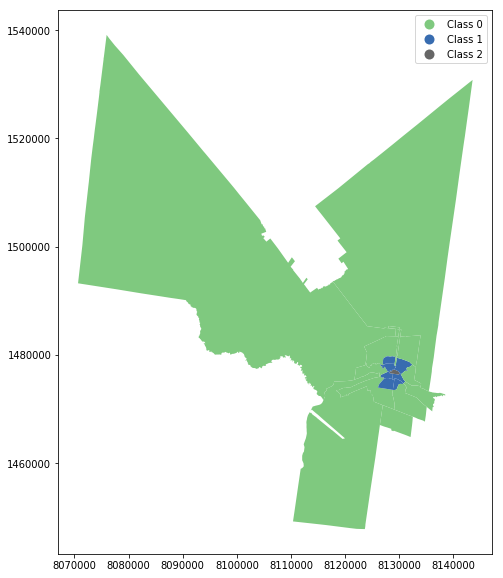

In [0]:
df_ct.plot(figsize= (15,10), column='Labels', legend=True, cmap = 'Accent')
plt.savefig('CTclassification.png')

# Interpretation of Classes

In [0]:
CT_cluster0 = df_ct[df_ct.Labels=="Class 0"]
CT_cluster1 = df_ct[df_ct.Labels=="Class 1"]
CT_cluster2 = df_ct[df_ct.Labels=="Class 2"]

# BCR

In [0]:
data0 = CT_cluster0.describe()["BCR"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["BCR"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["BCR"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.000020
25%    0.005614
50%    0.013441
75%    0.019584
max    0.029736
Name: BCR, dtype: float64
----------------------------
For Class 1
min    0.047745
25%    0.072659
50%    0.093826
75%    0.102722
max    0.110311
Name: BCR, dtype: float64
----------------------------
For Class 2
min    0.141235
25%    0.141235
50%    0.141235
75%    0.141235
max    0.141235
Name: BCR, dtype: float64


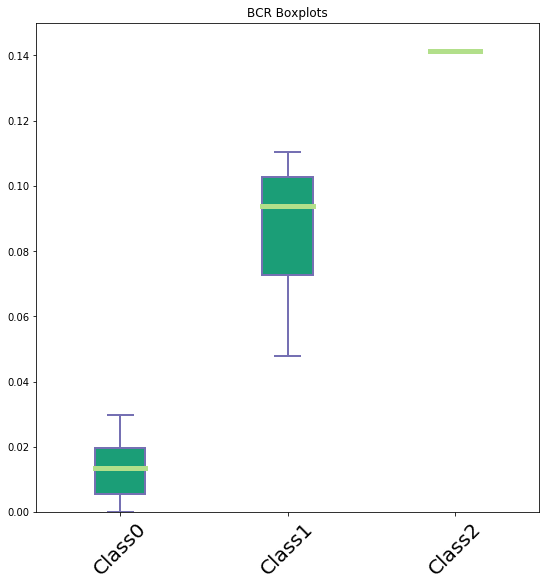

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('BCR Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.15)

# Save the figure
fig.savefig('BCRforCT.png', bbox_inches='tight')


# BD

In [0]:
data0 = CT_cluster0.describe()["BD"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["BD"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["BD"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    1.700000e-07
25%    3.739000e-05
50%    9.116000e-05
75%    1.320075e-04
max    1.968300e-04
Name: BD, dtype: float64
----------------------------
For Class 1
min    0.000342
25%    0.000350
50%    0.000389
75%    0.000542
max    0.000632
Name: BD, dtype: float64
----------------------------
For Class 2
min    0.000208
25%    0.000208
50%    0.000208
75%    0.000208
max    0.000208
Name: BD, dtype: float64


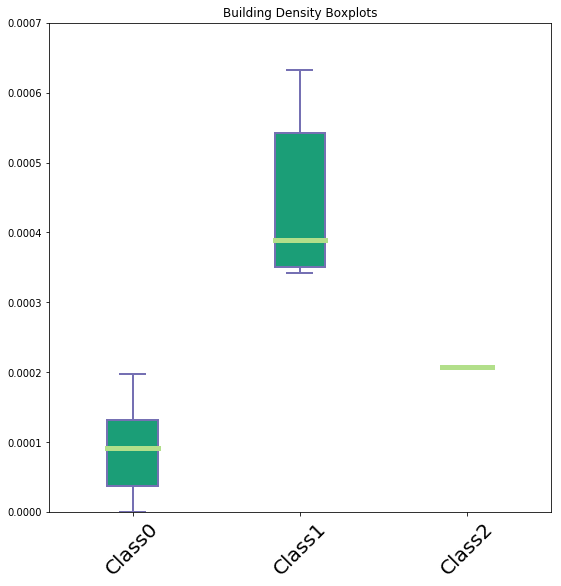

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Building Density Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.0007)

# Save the figure
fig.savefig('BuildingDensityforCT.png', bbox_inches='tight')


# Mean Proximity

In [0]:
data0 = CT_cluster0.describe()["ProxMean"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["ProxMean"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["ProxMean"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min     7.033473
25%     7.669334
50%     9.404242
75%    10.687768
max    25.350592
Name: ProxMean, dtype: float64
----------------------------
For Class 1
min    5.094526
25%    5.671390
50%    6.401214
75%    6.559969
max    6.614884
Name: ProxMean, dtype: float64
----------------------------
For Class 2
min    5.300526
25%    5.300526
50%    5.300526
75%    5.300526
max    5.300526
Name: ProxMean, dtype: float64


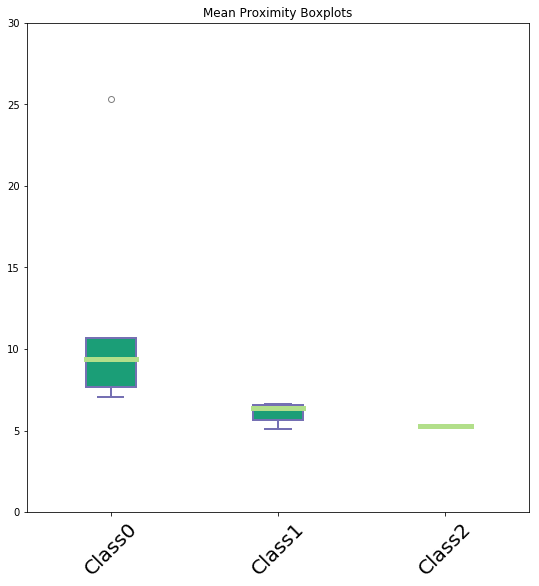

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Mean Proximity Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,30)

# Save the figure
fig.savefig('MeanProximityforCT.png', bbox_inches='tight')

# Average Size

In [0]:
data0 = CT_cluster0.describe()["AvgSize"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["AvgSize"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["AvgSize"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    116.672769
25%    121.856052
50%    128.816541
75%    177.753180
max    220.459314
Name: AvgSize, dtype: float64
----------------------------
For Class 1
min    139.090899
25%    152.315472
50%    187.525722
75%    210.447485
max    322.969667
Name: AvgSize, dtype: float64
----------------------------
For Class 2
min    680.288535
25%    680.288535
50%    680.288535
75%    680.288535
max    680.288535
Name: AvgSize, dtype: float64


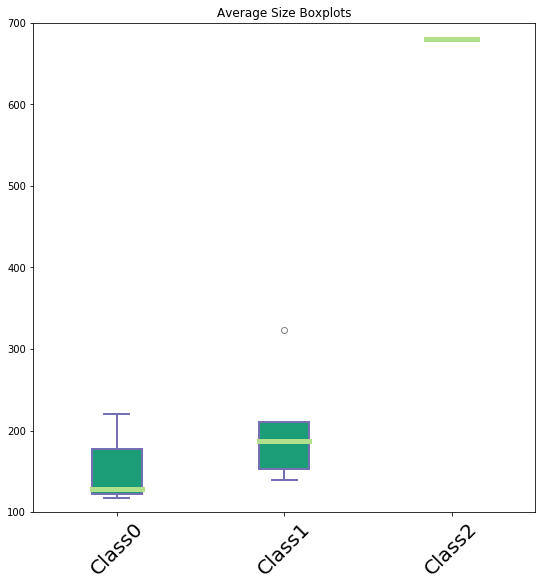

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Average Size Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(100,700)

# Save the figure
fig.savefig('AvgsizeforCT.png', bbox_inches='tight')


# Contiguity Ratio

In [0]:
data0 = CT_cluster0.describe()["ContRatio"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["ContRatio"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["ContRatio"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.031008
25%    0.047092
50%    0.072582
75%    0.081416
max    0.095943
Name: ContRatio, dtype: float64
----------------------------
For Class 1
min    0.042139
25%    0.070346
50%    0.084807
75%    0.139082
max    0.203938
Name: ContRatio, dtype: float64
----------------------------
For Class 2
min    0.266968
25%    0.266968
50%    0.266968
75%    0.266968
max    0.266968
Name: ContRatio, dtype: float64


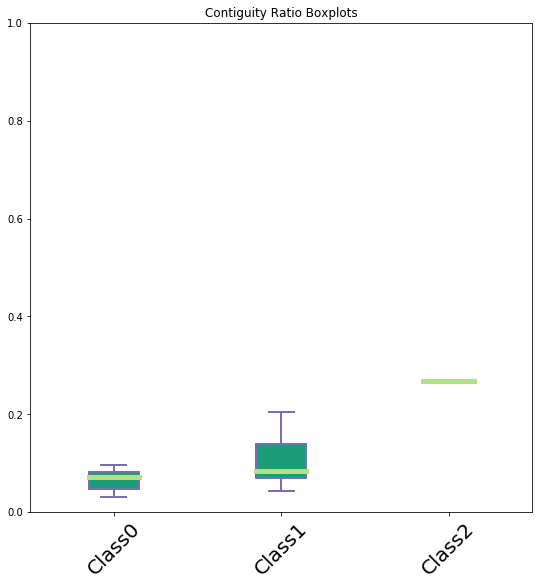

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Contiguity Ratio Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,1)

# Save the figure
fig.savefig('ContiguityRatioforCT.png', bbox_inches='tight')


## Deatiled Analysis of Census Tract classification

## Cluster 0
- BCR : Low
- BD : Low
- Mean Proximity : High
- Average Size : Low
- Contiguity Ratio : Low

##Cluster 1
- BCR : Medium
- BD    : High
- Mean Proximity : Medium
- Average Size : Medium
- Contiguity Ratio : Medium

## Cluster 2
- BCR : High
- BD : Medium
- Mean Proximity : Low
- Average Size : High
- Contiguity Ratio : High

# 2. Dissemination Block

In [0]:
dbstats.head()

,DBUID,PRNAME,CMANAME,CMATYPE,area,AvgSize,BldgCount,BD,BldgArea,BCR,ProxMean,ContCount,ContRatio,geometry
0,13030048021,New Brunswick / Nouveau-Brunswick,Fredericton,K,1.270082e+06,35.301770,1,7.900000e-07,35.301770,0.000028,15.831832,NaN,NaN,"POLYGON ((8137512.38857 1473207.954285, 813727..."
1,13100169002,New Brunswick / Nouveau-Brunswick,Fredericton,K,5.118546e+06,94.382806,379,7.404000e-05,35771.083582,0.006989,9.000438,29.0,0.076517,"POLYGON ((8131473.282855 1481092.42, 8131473.8..."
2,13100169003,New Brunswick / Nouveau-Brunswick,Fredericton,K,1.571628e+04,121.442266,20,1.272570e-03,2428.845315,0.154543,3.308095,2.0,0.100000,"POLYGON ((8131278.14857 1481200.117145, 813128..."
3,13100169004,New Brunswick / Nouveau-Brunswick,Fredericton,K,2.625598e+04,92.463317,39,1.485380e-03,3606.069374,0.137343,5.486691,2.0,0.051282,"POLYGON ((8131146.74857 1480994.94, 8131149.04..."
4,13100169005,New Brunswick / Nouveau-Brunswick,Fredericton,K,3.512295e+04,93.529626,23,6.548400e-04,2151.181409,0.061247,5.138314,4.0,0.173913,"POLYGON ((8131473.282855 1481092.42, 8131480.5..."


In [0]:
df_db = dbstats.drop(['PRNAME','CMANAME','CMATYPE','area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)
df_db = df_db.dropna(axis='rows')
df_db.head()

,DBUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry
1,13100169002,94.382806,0.000074,0.006989,9.000438,0.076517,"POLYGON ((8131473.282855 1481092.42, 8131473.8..."
2,13100169003,121.442266,0.001273,0.154543,3.308095,0.100000,"POLYGON ((8131278.14857 1481200.117145, 813128..."
3,13100169004,92.463317,0.001485,0.137343,5.486691,0.051282,"POLYGON ((8131146.74857 1480994.94, 8131149.04..."
4,13100169005,93.529626,0.000655,0.061247,5.138314,0.173913,"POLYGON ((8131473.282855 1481092.42, 8131480.5..."
6,13100170003,78.459693,0.001581,0.124043,3.903380,0.080000,"POLYGON ((8132052.342855 1479440.30857, 813204..."


## Classification Task on the Dissemination Block data

In [0]:
X = df_db.values[:,1:-1] #we are taking only the 5 statistics
cluster_dataset = StandardScaler().fit_transform(X) #creating standard scalar from unscaled data a 
cluster_dataset

array([[-0.25676964, -1.30051514, -1.36231792,  0.26686341, -0.50575756],
       [-0.20779868,  0.79255152,  0.49347729, -0.5651409 , -0.34231602],
       [-0.26024344,  1.16419472,  0.27714716, -0.24671292, -0.68139483],
       ...,
       [-0.29963364,  1.71438591,  0.15067125, -0.52856619,  0.12168657],
       [-0.10340962, -0.41970278, -0.14714146,  0.04606157, -0.43309914],
       [-0.21111882,  0.24384474, -0.00853089, -0.21608468, -0.53213527]])

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
# fit the X value to the model
k_means.fit(cluster_dataset)
labels = k_means.labels_
labels

array([2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1,

In [0]:
new_lab = []
for label in labels:
    new_lab.append("Class "+str(label))

In [0]:
new_lab = np.asarray(new_lab)
new_lab


array(['Class 2', 'Class 1', 'Class 1', 'Class 2', 'Class 1', 'Class 1',
       'Class 2', 'Class 2', 'Class 1', 'Class 1', 'Class 1', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 1', 'Class 2',
       'Class 1', 'Class 1', 'Class 2', 'Class 1', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 1', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 1', 'Class 1', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 1', 'Class 1', 'Class 1', 'Class 1',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 1', 'Class 1', 'Class 2',
       'Class 1', 'Class 1', 'Class 2', 'Class 1', 'Class 2', 'Class 1',
       'Class 2', 'Class 1', 'Class 1', 'Class 1', 'Class 2', 'Class 2',
       'Class 2', 'Class 1', 'Class 2', 'Class 1', 

In [0]:
df_db['Labels'] = new_lab
df_db.head()

,DBUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry,Labels
1,13100169002,94.382806,0.000074,0.006989,9.000438,0.076517,"POLYGON ((8131473.282855 1481092.42, 8131473.8...",Class 2
2,13100169003,121.442266,0.001273,0.154543,3.308095,0.100000,"POLYGON ((8131278.14857 1481200.117145, 813128...",Class 1
3,13100169004,92.463317,0.001485,0.137343,5.486691,0.051282,"POLYGON ((8131146.74857 1480994.94, 8131149.04...",Class 1
4,13100169005,93.529626,0.000655,0.061247,5.138314,0.173913,"POLYGON ((8131473.282855 1481092.42, 8131480.5...",Class 2
6,13100170003,78.459693,0.001581,0.124043,3.903380,0.080000,"POLYGON ((8132052.342855 1479440.30857, 813204...",Class 1


In [0]:
df_db['Labels'] = df_db['Labels'].astype(object)

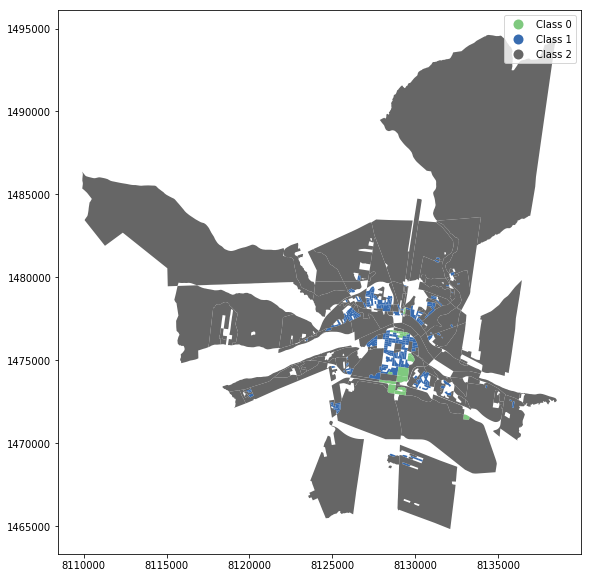

In [0]:
df_db.plot(figsize= (10,10), column='Labels', legend=True, cmap = 'Accent')
plt.savefig('DBclassification.png')

# Interpretation of Classes

In [0]:
DB_cluster0 = df_db[df_db.Labels=="Class 0"]
DB_cluster1 = df_db[df_db.Labels=="Class 1"]
DB_cluster2 = df_db[df_db.Labels=="Class 2"]

# BCR

In [0]:
data0 = DB_cluster0.describe()["BCR"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["BCR"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["BCR"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.001579
25%    0.126783
50%    0.220529
75%    0.330972
max    0.608565
Name: BCR, dtype: float64
----------------------------
For Class 1
min    0.081386
25%    0.118238
50%    0.134459
75%    0.166983
max    0.287868
Name: BCR, dtype: float64
----------------------------
For Class 2
min    0.000052
25%    0.015611
50%    0.049528
75%    0.078019
max    0.175069
Name: BCR, dtype: float64


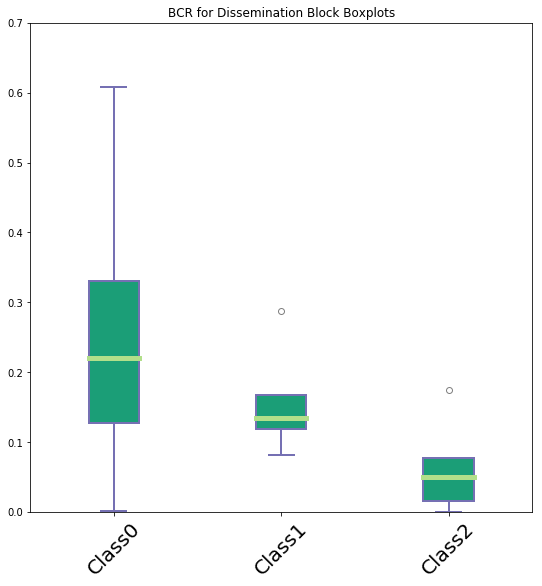

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('BCR for Dissemination Block Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.7)

# Save the figure
fig.savefig('BCRforDB.png', bbox_inches='tight')

# Building Density

In [0]:
data0 = DB_cluster0.describe()["BD"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["BD"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["BD"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.000021
25%    0.000152
50%    0.000225
75%    0.000365
max    0.000518
Name: BD, dtype: float64
----------------------------
For Class 1
min    0.000411
25%    0.000983
50%    0.001208
75%    0.001392
max    0.003485
Name: BD, dtype: float64
----------------------------
For Class 2
min    4.500000e-07
25%    8.612750e-05
50%    2.489800e-04
75%    5.280800e-04
max    8.110400e-04
Name: BD, dtype: float64


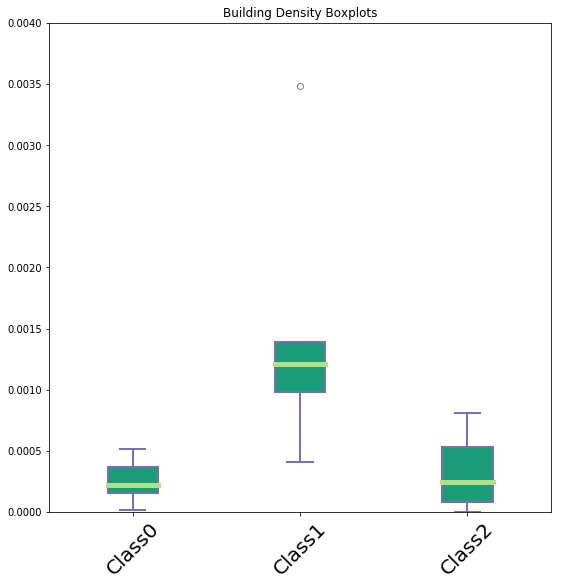

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Building Density Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.004)

# Save the figure
fig.savefig('BuildingDensityforDB.png', bbox_inches='tight')

# Mean Proximity


In [0]:
data0 = DB_cluster0.describe()["ProxMean"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["ProxMean"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["ProxMean"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min     0.000000
25%     1.545368
50%     2.374903
75%     5.858576
max    10.773764
Name: ProxMean, dtype: float64
----------------------------
For Class 1
min    2.067293
25%    3.982275
50%    4.939585
75%    5.619707
max    9.121256
Name: ProxMean, dtype: float64
----------------------------
For Class 2
min     4.029900
25%     6.826812
50%     8.591701
75%    12.232542
max    99.031307
Name: ProxMean, dtype: float64


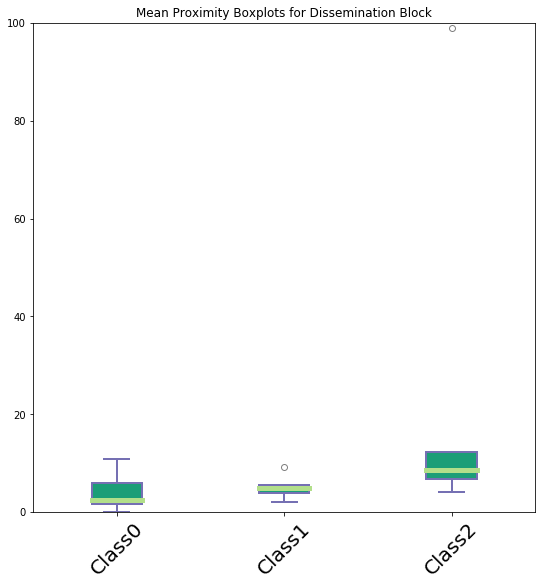

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Mean Proximity Boxplots for Dissemination Block')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,100)

# Save the figure
fig.savefig('MeanProximityforDB.png', bbox_inches='tight')

# Average Size

In [0]:
data0 = DB_cluster0.describe()["AvgSize"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["AvgSize"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["AvgSize"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min      76.910168
25%     538.851281
50%     763.879949
75%    1260.783068
max    9242.018220
Name: AvgSize, dtype: float64
----------------------------
For Class 1
min     55.305510
25%     95.582048
50%    115.783655
75%    145.661920
max    456.290154
Name: AvgSize, dtype: float64
----------------------------
For Class 2
min      58.129164
25%     114.667514
50%     144.081508
75%     217.821552
max    1051.643073
Name: AvgSize, dtype: float64


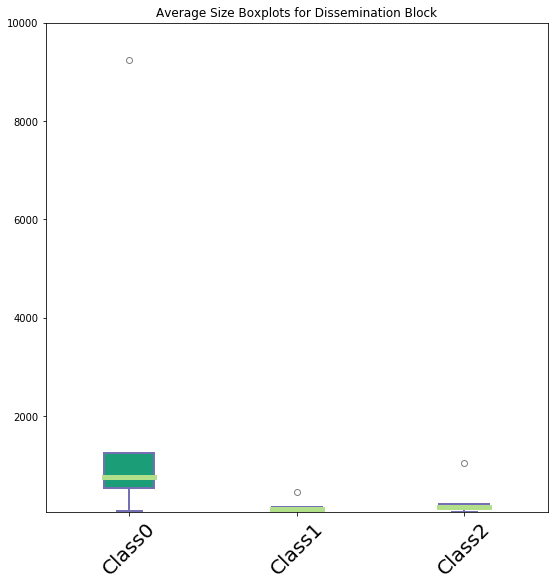

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Average Size Boxplots for Dissemination Block')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(50,10000)

# Save the figure
fig.savefig('AvgsizeforDB.png', bbox_inches='tight')

# Contiguity Ratio

In [0]:
data0 = DB_cluster0.describe()["ContRatio"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["ContRatio"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["ContRatio"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.272727
25%    0.461538
50%    0.562500
75%    0.638889
max    1.000000
Name: ContRatio, dtype: float64
----------------------------
For Class 1
min    0.026667
25%    0.058824
50%    0.105263
75%    0.173913
max    0.428571
Name: ContRatio, dtype: float64
----------------------------
For Class 2
min    0.010050
25%    0.055428
50%    0.081969
75%    0.137360
max    0.500000
Name: ContRatio, dtype: float64


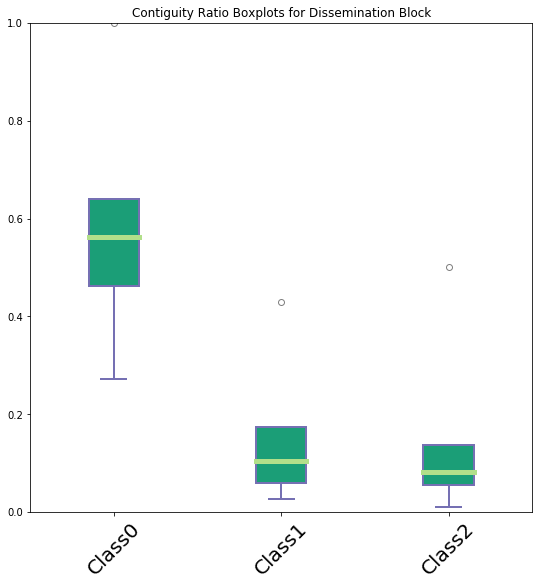

In [0]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Contiguity Ratio Boxplots for Dissemination Block')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,1)

# Save the figure
fig.savefig('ContiguityRatioforDB.png', bbox_inches='tight')

## Cluster 0
- BCR : High
- BD : Low
- Mean Proximity : Low
- Average Size : High
- Contiguity Ratio : High



## Cluster 1
- BCR : Medium
- BD    : High
- Mean Proximity : Medium
- Average Size : Low
- Contiguity Ratio : Medium

## Cluster 2
- BCR : Low
- BD : Medium
- Mean Proximity : High
- Average Size : Medium
- Contiguity Ratio : Low

#3. 1 km2 Grid

In [0]:
gridstats.head()

,id,area,AvgSize,BldgCount,BD,BldgArea,BCR,ProxMean,ContCount,ContRatio,geometry
0,6173,1000000.0,134.579555,1,0.000001,134.579555,0.000135,89.914361,NaN,NaN,"POLYGON ((8116757 1477130.3, 8117757 1477130.3..."
1,6174,1000000.0,100.259455,28,0.000028,2807.264751,0.002807,21.719138,2.0,0.071429,"POLYGON ((8116757 1476130.3, 8117757 1476130.3..."
2,6302,1000000.0,134.594242,63,0.000063,8479.437271,0.008479,23.402028,NaN,NaN,"POLYGON ((8117757 1478130.3, 8118757 1478130.3..."
3,6303,1000000.0,128.774280,176,0.000176,22664.273216,0.022664,15.191105,11.0,0.062500,"POLYGON ((8117757 1477130.3, 8118757 1477130.3..."
4,6304,1000000.0,118.499905,90,0.000090,10664.991418,0.010665,12.712510,2.0,0.022222,"POLYGON ((8117757 1476130.3, 8118757 1476130.3..."


In [0]:
df_grid = gridstats.drop(['area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)

In [0]:
df_grid = df_grid.dropna(axis='rows')
df_grid.head()

,id,AvgSize,BD,BCR,ProxMean,ContRatio,geometry
1,6174,100.259455,0.000028,0.002807,21.719138,0.071429,"POLYGON ((8116757 1476130.3, 8117757 1476130.3..."
3,6303,128.774280,0.000176,0.022664,15.191105,0.062500,"POLYGON ((8117757 1477130.3, 8118757 1477130.3..."
4,6304,118.499905,0.000090,0.010665,12.712510,0.022222,"POLYGON ((8117757 1476130.3, 8118757 1476130.3..."
11,6436,119.111630,0.000058,0.006908,18.305036,0.086207,"POLYGON ((8118757 1474130.3, 8119757 1474130.3..."
12,6437,148.310204,0.000104,0.015424,14.591931,0.019231,"POLYGON ((8118757 1473130.3, 8119757 1473130.3..."


In [0]:
X = df_grid.values[:,1:-1] #we are taking only the 5 statistics
cluster_dataset = StandardScaler().fit_transform(X) #creating standard scalar from unscaled data a 
cluster_dataset

array([[-0.31872529, -0.86969723, -0.93096842,  1.29772911, -0.34381475],
       [-0.25289235, -0.17621535, -0.3544052 ,  0.51785392, -0.42935892],
       [-0.27661308, -0.57918455, -0.70281332,  0.22174715, -0.81525827],
       [-0.27520077, -0.72912658, -0.81188671,  0.88986146, -0.20222432],
       [-0.20778924, -0.51358491, -0.56462434,  0.44627325, -0.8439192 ],
       [-0.2938191 , -0.52764198, -0.68682072,  0.54670163, -0.07955944],
       [-0.27066664, -0.26524343, -0.46054278, -0.18200049, -0.41791668],
       [-0.08067169, -0.84626879, -0.81761459,  1.63805068, -0.44750466],
       [-0.19768833, -0.65884125, -0.68884596,  0.17029763,  0.28429051],
       [-0.35163712, -0.90718274, -0.96253551,  0.15307667, -0.07007334],
       [-0.34933404, -0.85095448, -0.93164234,  0.20187453,  0.76825968],
       [-0.30519759, -0.57449886, -0.73208659,  0.00924203, -0.60702765],
       [-0.28961929, -0.26524343, -0.49796493, -0.11757653, -0.90611795],
       [-0.39057149, -0.95872531, -0.9

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
# fit the X value to the model
k_means.fit(cluster_dataset)
labels = k_means.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       0, 2], dtype=int32)

In [0]:
new_lab = []
for label in labels:
    new_lab.append("Class "+str(label))

In [0]:
new_lab = np.asarray(new_lab)
new_lab

array(['Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 0', 'Class 0', 'Class 0',
       'Class 2', 'Class 0', 'Class 2', 'Class 2', 'Class 2', 'Class 0',
       'Class 0', 'Class 2', 'Class 0', 'Class 2', 'Class 1', 'Class 2',
       'Class 0', 'Class 2', 'Class 0', 'Class 0', 'Class 0', 'Class 0',
       'Class 1', 'Class 2', 'Class 2', 'Class 2', 'Class 0', 'Class 2',
       'Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 0', 'Class 2', 'Class 2',
       'Class 0', 'Class 0', 'Class 1', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 

In [0]:
df_grid['Labels'] = new_lab
df_grid.head()

,id,AvgSize,BD,BCR,ProxMean,ContRatio,geometry,Labels
1,6174,100.259455,0.000028,0.002807,21.719138,0.071429,"POLYGON ((8116757 1476130.3, 8117757 1476130.3...",Class 2
3,6303,128.774280,0.000176,0.022664,15.191105,0.062500,"POLYGON ((8117757 1477130.3, 8118757 1477130.3...",Class 2
4,6304,118.499905,0.000090,0.010665,12.712510,0.022222,"POLYGON ((8117757 1476130.3, 8118757 1476130.3...",Class 2
11,6436,119.111630,0.000058,0.006908,18.305036,0.086207,"POLYGON ((8118757 1474130.3, 8119757 1474130.3...",Class 2
12,6437,148.310204,0.000104,0.015424,14.591931,0.019231,"POLYGON ((8118757 1473130.3, 8119757 1473130.3...",Class 2


In [0]:
df_grid['Labels'] = df_grid['Labels'].astype(object)

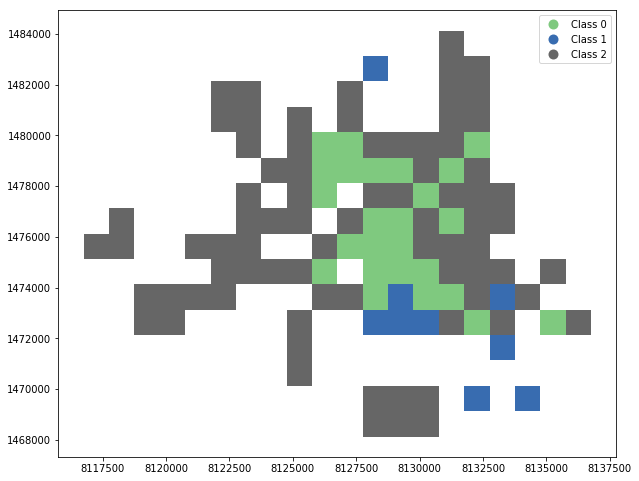

In [149]:
df_grid.plot(figsize= (10,10), column='Labels', legend=True , cmap = 'Accent')
plt.savefig('GRIDclassification.png')

# Interpretation of Classes

In [0]:
GRID_cluster0 = df_grid[df_grid.Labels=="Class 0"]
GRID_cluster1 = df_grid[df_grid.Labels=="Class 1"]
GRID_cluster2 = df_grid[df_grid.Labels=="Class 2"]

# BCR

In [151]:
data0 = GRID_cluster0.describe()["BCR"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["BCR"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["BCR"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.052060
25%    0.065899
50%    0.078103
75%    0.103015
max    0.177135
Name: BCR, dtype: float64
----------------------------
For Class 1
min    0.000285
25%    0.001280
50%    0.011391
75%    0.013046
max    0.064790
Name: BCR, dtype: float64
----------------------------
For Class 2
min    0.000622
25%    0.009607
50%    0.016925
75%    0.027620
max    0.057201
Name: BCR, dtype: float64


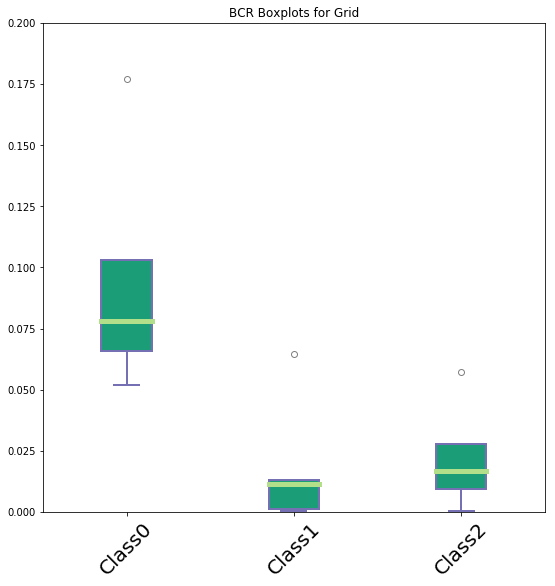

In [152]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('BCR Boxplots for Grid')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.2)

# Save the figure
fig.savefig('BCRforGRID.png', bbox_inches='tight')

# Building Density

In [153]:
data0 = GRID_cluster0.describe()["BD"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["BD"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["BD"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.000083
25%    0.000408
50%    0.000542
75%    0.000721
max    0.000857
Name: BD, dtype: float64
----------------------------
For Class 1
min    0.000003
25%    0.000011
50%    0.000015
75%    0.000028
max    0.000085
Name: BD, dtype: float64
----------------------------
For Class 2
min    0.000006
25%    0.000063
50%    0.000105
75%    0.000189
max    0.000373
Name: BD, dtype: float64


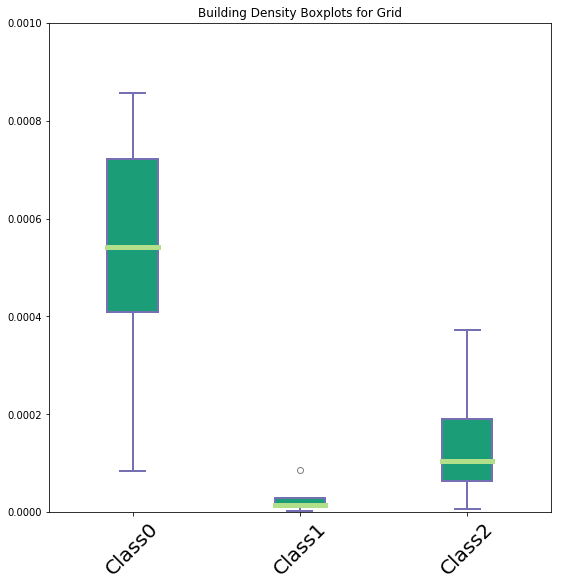

In [154]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Building Density Boxplots for Grid')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.001)

# Save the figure
fig.savefig('BuildingDensityforGRID.png', bbox_inches='tight')


# Mean Proximity

In [155]:
data0 = GRID_cluster0.describe()["ProxMean"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["ProxMean"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["ProxMean"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min     4.009829
25%     5.408081
50%     5.810774
75%     6.598167
max    12.270416
Name: ProxMean, dtype: float64
----------------------------
For Class 1
min     9.033781
25%    18.492406
50%    20.970261
75%    38.106315
max    73.007710
Name: ProxMean, dtype: float64
----------------------------
For Class 2
min     5.149508
25%     7.239495
50%     9.325261
75%    12.245808
max    24.567838
Name: ProxMean, dtype: float64


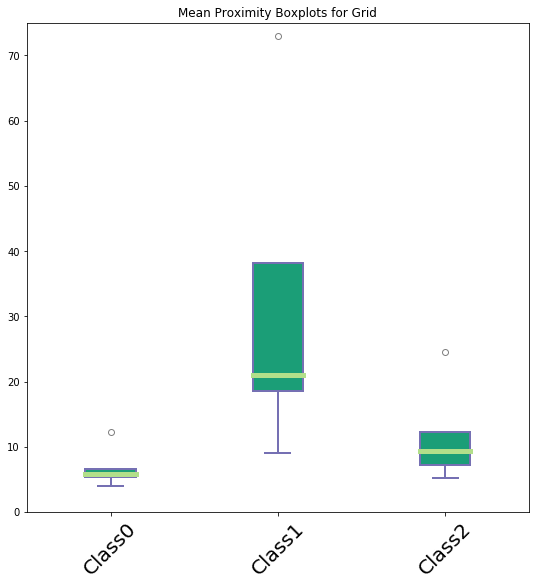

In [156]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Mean Proximity Boxplots for Grid')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,75)

# Save the figure
fig.savefig('MeanProximityforGRID.png', bbox_inches='tight')

#Average Size

In [157]:
data0 = GRID_cluster0.describe()["AvgSize"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["AvgSize"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["AvgSize"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min     103.871397
25%     121.874574
50%     140.573612
75%     185.508574
max    1182.551832
Name: AvgSize, dtype: float64
----------------------------
For Class 1
min      78.112184
25%     106.647014
50%     714.272974
75%     762.234325
max    4188.220849
Name: AvgSize, dtype: float64
----------------------------
For Class 2
min     69.140052
25%    111.149080
50%    131.265070
75%    170.243575
max    740.917648
Name: AvgSize, dtype: float64


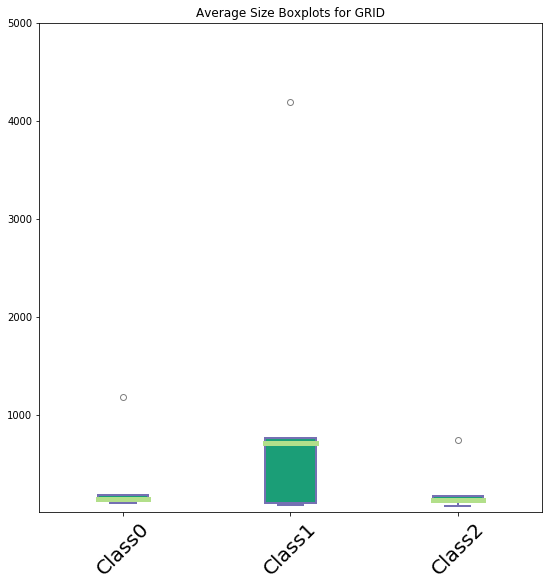

In [158]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Average Size Boxplots for GRID')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(10,5000)

# Save the figure
fig.savefig('AvgsizeforGRID.png', bbox_inches='tight')

# Contiguity Ratio

In [159]:
data0 = GRID_cluster0.describe()["ContRatio"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["ContRatio"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["ContRatio"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.017167
25%    0.055957
50%    0.070000
75%    0.132450
max    0.194672
Name: ContRatio, dtype: float64
----------------------------
For Class 1
min    0.133333
25%    0.181818
50%    0.300000
75%    0.458824
max    0.666667
Name: ContRatio, dtype: float64
----------------------------
For Class 2
min    0.012739
25%    0.041952
50%    0.071429
75%    0.103594
max    0.272727
Name: ContRatio, dtype: float64


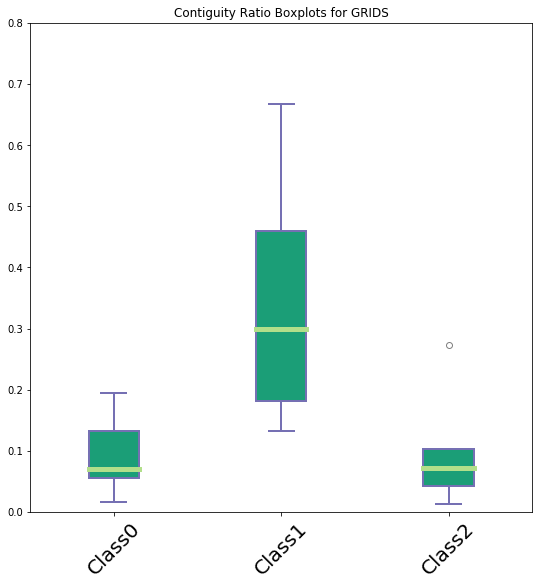

In [160]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Contiguity Ratio Boxplots for GRIDS')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.8)

# Save the figure
fig.savefig('ContiguityRatioforGRID.png', bbox_inches='tight')

## Cluster 0 
- BCR : Medium
- BD : Medium
- Mean Proximity : Medium
- Average Size : Low
- Contiguity Ratio : Medium

## Cluster 1
- BCR : Low
- BD : Low
- Mean Proximity : High
- Average Size : High
- Contiguity Ratio : High



## Cluster 2
- BCR : High
- BD : High
- Mean Proximity : Low
- Average Size : Medium
- Contiguity Ratio : Low

In [0]:
# !pip install geocoder
# import geocoder

In [0]:
# from geopy.geocoders import Nominatim

In [0]:
# address = 'Fredericton, New Brunswick'

# geolocator = Nominatim()
# location = geolocator.geocode(address)
# latitude = location.latitude
# longitude = location.longitude
# print('The geograpical coordinate of Fredericton are {}, {}.'.format(latitude, longitude))